- Anmol More - 11915043
- Shlok Mittal - 11915071

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

pd.set_option("max_colwidth",1000)

In [2]:
cab_data = pd.read_csv("../data/cabData.csv")

In [3]:
cab_data.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]"
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[-8.642196,41.160114],[-8.644455,41.160492],[-8.646921,41.160951],[-8.649999,41.161491],[-8.653167,41.162031],[-8.656434,41.16258],[-8.660178,41.163192],[-8.663112,41.163687],[-8.666235,41.1642],[-8.669169,41.164704],[-8.670852,41.165136],[-8.670942,41.166576],[-8.66961,41.167962],[-8.668098,41.168988],[-8.66664,41.170005],[-8.665767,41.170635],[-8.66574,41.170671]]"
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-8.614215,41.140278],[-8.614773,41.140368],[-8.615907,41.140449],[-8.616609,41.140602],[-8.618472,41.141412],[-8.620623,41.142789],[-8.622558,41.144094],[-8.62506,41.144805],[-8.627436,41.144733],[-8.630082,41.145174],[-8.6319,41.146461],[-8.632584,41.147316],[-8.631252,41.148774],[-8.629713,41.150628],[-8.628804,41.152077],[-8.628579,41.152464],[-8.62875,41.152662],[-8.630424,41.15277],[-8.632683,41.152779],[-8.635131,41.152563],[-8.637705,41.153013],[-8.64036,41.15358],[-8.642205,41.154021],[-8.644068,41.154507],[-8.646453,41.154336],[-8.648613,41.1543],[-8.649504,41.154336],[-8.649837,41.154354],[-8.649837,41.1543],[-8.649882,41.154282],[-8.649936,41.1543],[-8.6499,41.154264],[-8.599383,41.141736],[-8.59653,41.140566],[-8.65008,41.154291],[-8.650395,41.153814],[-8.650377,41.153832],[-8.650359,41.153787],[-8.649891,41.153166],[-8.649369,41.152572],[-8.649198,41.152374],[-8.649711,41.151213],[-8.649117,41.150466],[-8.649117,41.149062],[..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8.574723,41.151933],[-8.574714,41.151924],[-8.574714,41.151924],[-8.575164,41.150934],[-8.577135,41.150232],[-8.57853,41.148639],[-8.579745,41.147316],[-8.579358,41.146173],[-8.580744,41.14503],[-8.582904,41.14512],[-8.58438,41.146479],[-8.610849,41.145876],[-8.610012,41.146479],[-8.609058,41.146866],[-8.608968,41.147055],[-8.586027,41.148702],[-8.587197,41.149224],[-8.588205,41.148963],[-8.588835,41.147604],[-8.590176,41.147082],[-8.592543,41.146614],[-8.594721,41.146245],[-8.596737,41.146317],[-8.59869,41.146119],[-8.598816,41.146101],[-8.600193,41.146155],[-8.601057,41.146101],[-8.602344,41.14575],[-8.602785,41.145705],[-8.60328,41.145597],[-8.604045,41.145417],[-8.604657,41.144256],[-8.605854,41.142555],[-8.607951,41.142753],[-8.607978,41.142825],[-8.607996,41.142879],[-8.607987,41.142888],[-8.608005,41.142915],[-8.607996,41.142915]]"
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-8.646048,41.180049],[-8.646804,41.178888],[-8.649495,41.178465],[-8.65215,41.177961],[-8.654049,41.177196],[-8.655012,41.177925],[-8.656353,41.177853],[-8.659647,41.177277],[-8.662518,41.177619],[-8.664561,41.179221],[-8.667432,41.178537],[-8.668944,41.176674],[-8.671374,41.17518],[-8.673894,41.173308],[-8.676918,41.171841],[-8.680032,41.171949],[-8.682615,41.173191],[-8.685441,41.173776],[-8.688105,41.17365],[-8.688879,41.174379],[-8.689059,41.17608],[-8.689086,41.176431],[-8.689059,41.176593],[-8.687502,41.176755],[-8.687259,41.177781],[-8.687259,41.178078],[-8.687268,41.178087]]"


In [7]:
cab_data.columns

Index(['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID',
       'TIMESTAMP', 'DAY_TYPE', 'MISSING_DATA', 'POLYLINE'],
      dtype='object')

In [8]:
cab_data['Date_Time'] = pd.to_datetime(cab_data['TIMESTAMP'],unit='s')

In [9]:
cab_data.drop(['TIMESTAMP'], axis = 'columns',inplace  = True)

In [10]:
cab_data['Year'] = [d.year for d in cab_data['Date_Time']]
cab_data['Month'] = [d.month for d in cab_data['Date_Time']]
cab_data['Day'] = [d.day for d in cab_data['Date_Time']]
cab_data['Hour'] = [d.hour for d in cab_data['Date_Time']]
cab_data['Minute'] = [d.minute for d in cab_data['Date_Time']]
cab_data['Week_Day'] = [d.weekday() for d in cab_data['Date_Time']]

In [11]:
cab_data.to_csv("../data/raw/cabData_with_Y_M_D_info.csv")

In [19]:
cab_data_nomiss = cab_data[cab_data['MISSING_DATA'] == False]

In [20]:
cab_data_nomiss['num_coord'] = [len(eval(route)) for route in cab_data_nomiss['POLYLINE']]

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
cab_data_nomiss['Trip_time_in_sec'] = cab_data_nomiss['num_coord'] *15
cab_data_nomiss['Trip_time_in_min'] = cab_data_nomiss['Trip_time_in_sec'] / 60

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
cab_data_nomiss['Trip_time_in_min'].describe()

count    1.710660e+06
mean     1.218951e+01
std      1.141306e+01
min      0.000000e+00
25%      7.000000e+00
50%      1.025000e+01
75%      1.475000e+01
max      9.702500e+02
Name: Trip_time_in_min, dtype: float64

### Trip Time

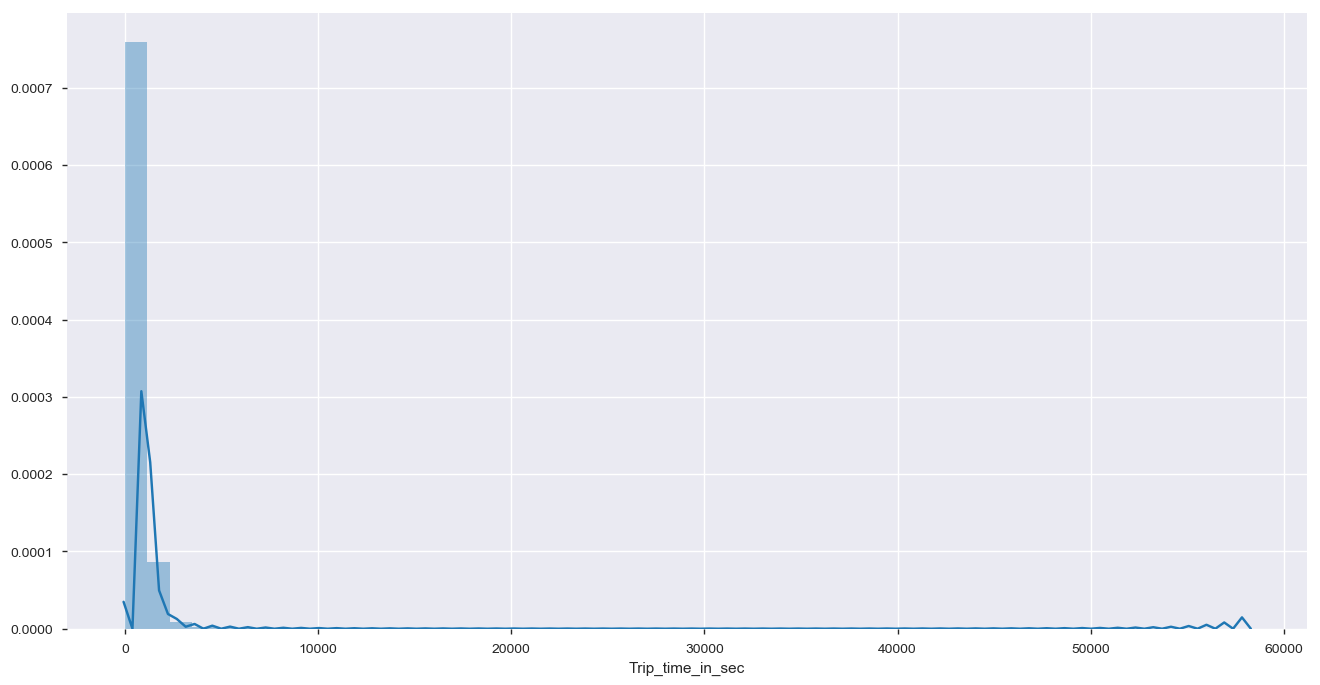

In [30]:
plt.figure(figsize=(16, 8))
sns.distplot(cab_data_nomiss['Trip_time_in_sec'])

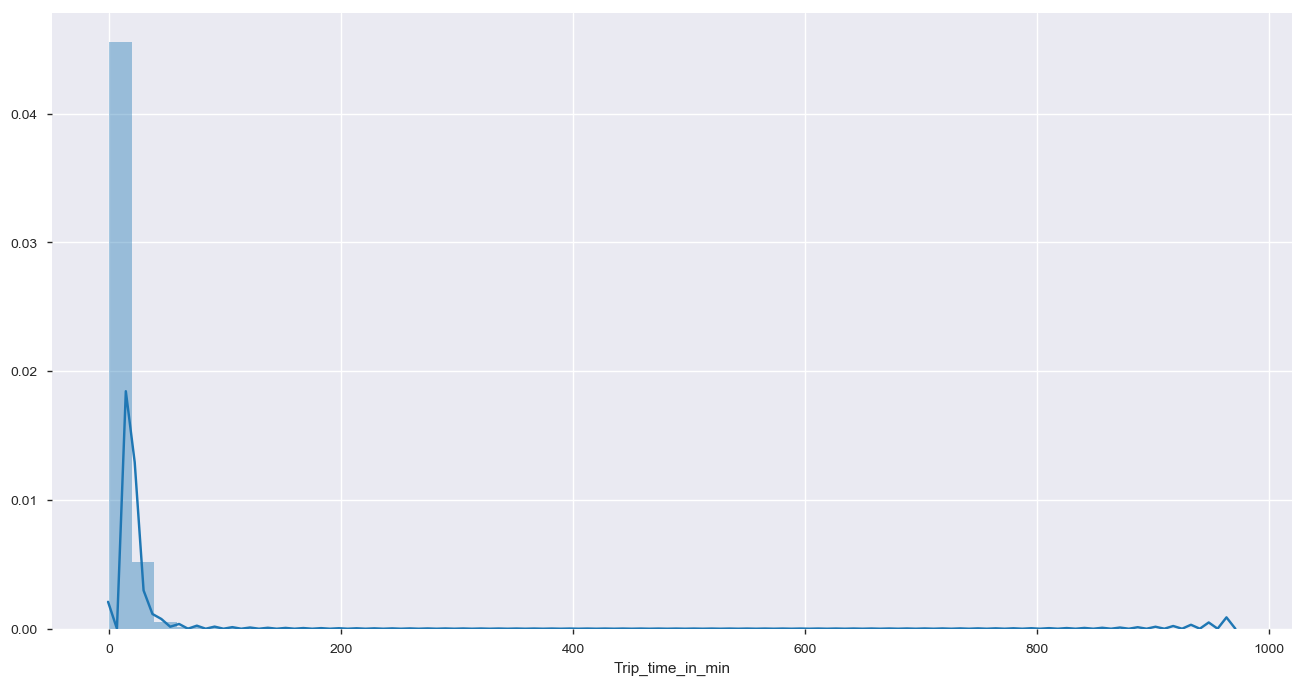

In [31]:
plt.figure(figsize=(16, 8))
sns.distplot(cab_data_nomiss['Trip_time_in_min'])

In [27]:
pp.ProfileReport(cab_data_nomiss[cab_data_nomiss['Trip_time_in_min'] > 200])

Number of variables,19
Number of observations,642
Total Missing (%),9.6%
Total size in memory,91.0 KiB
Average record size in memory,145.1 B
Numeric,10
Categorical,1
Boolean,1
Date,1
Text (Unique),1
Rejected,5


In [34]:
pp.ProfileReport(cab_data_nomiss[cab_data_nomiss['Trip_time_in_sec'] < 30])

Number of variables,19
Number of observations,36508
Total Missing (%),8.9%
Total size in memory,5.0 MiB
Average record size in memory,145.0 B
Numeric,9
Categorical,2
Boolean,2
Date,1
Text (Unique),0
Rejected,5


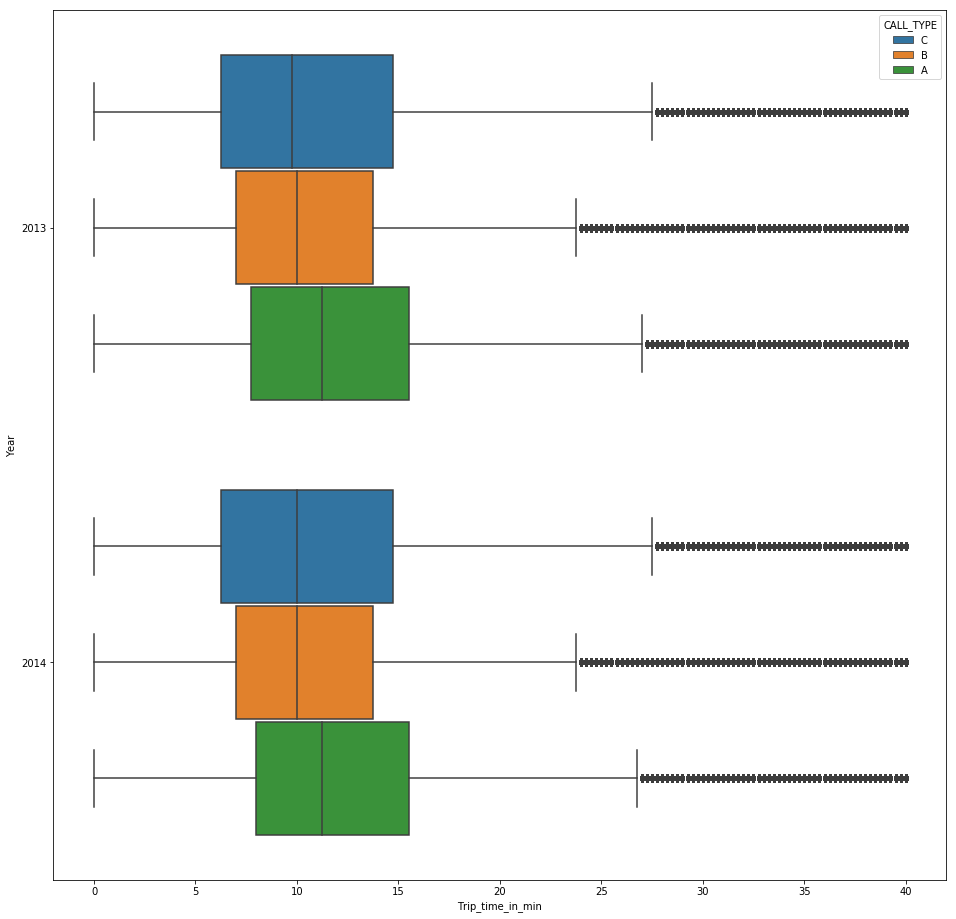

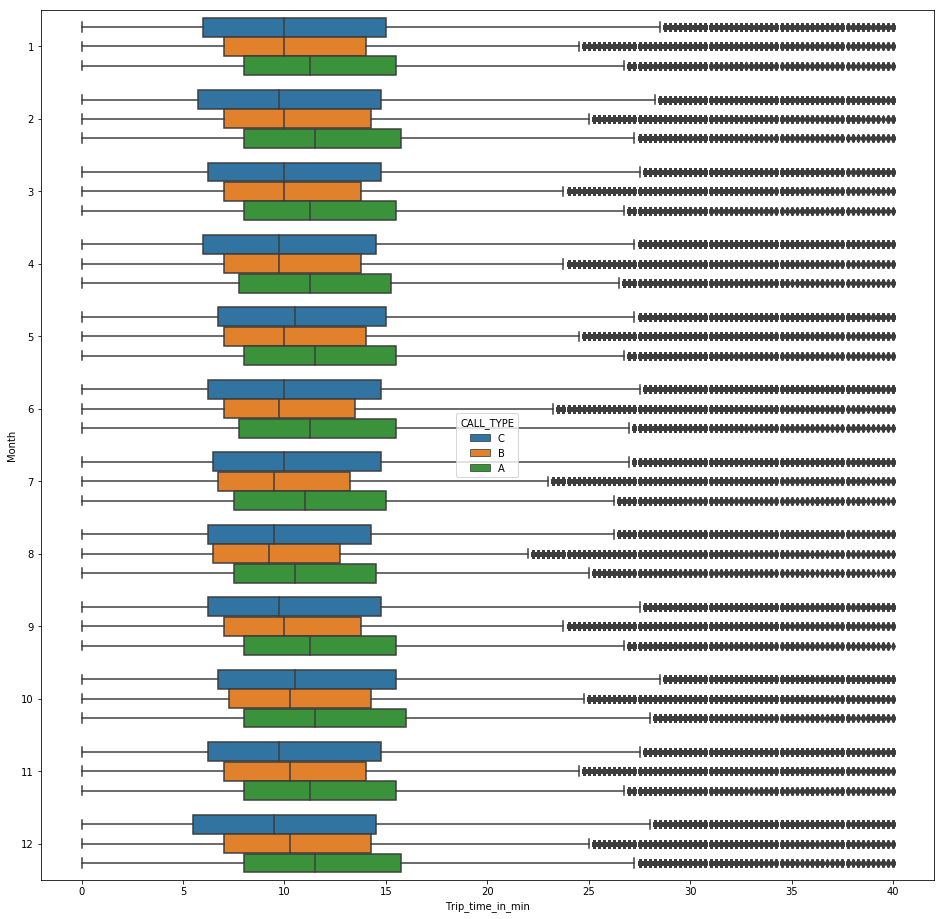

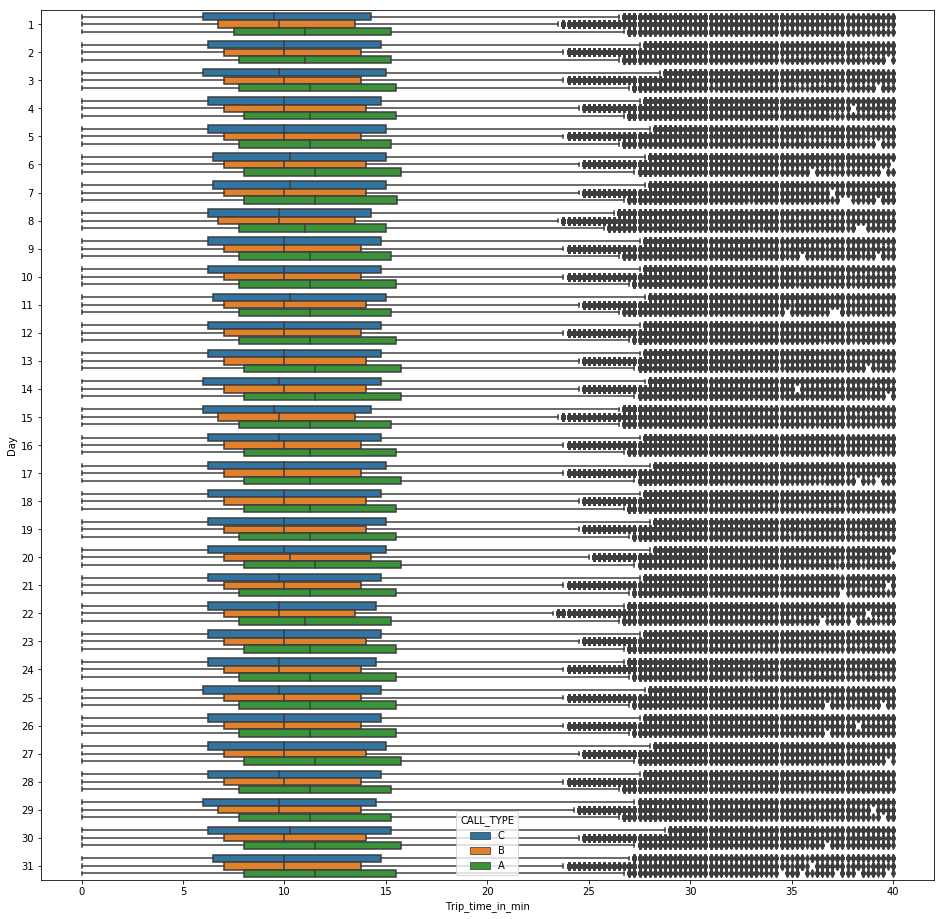

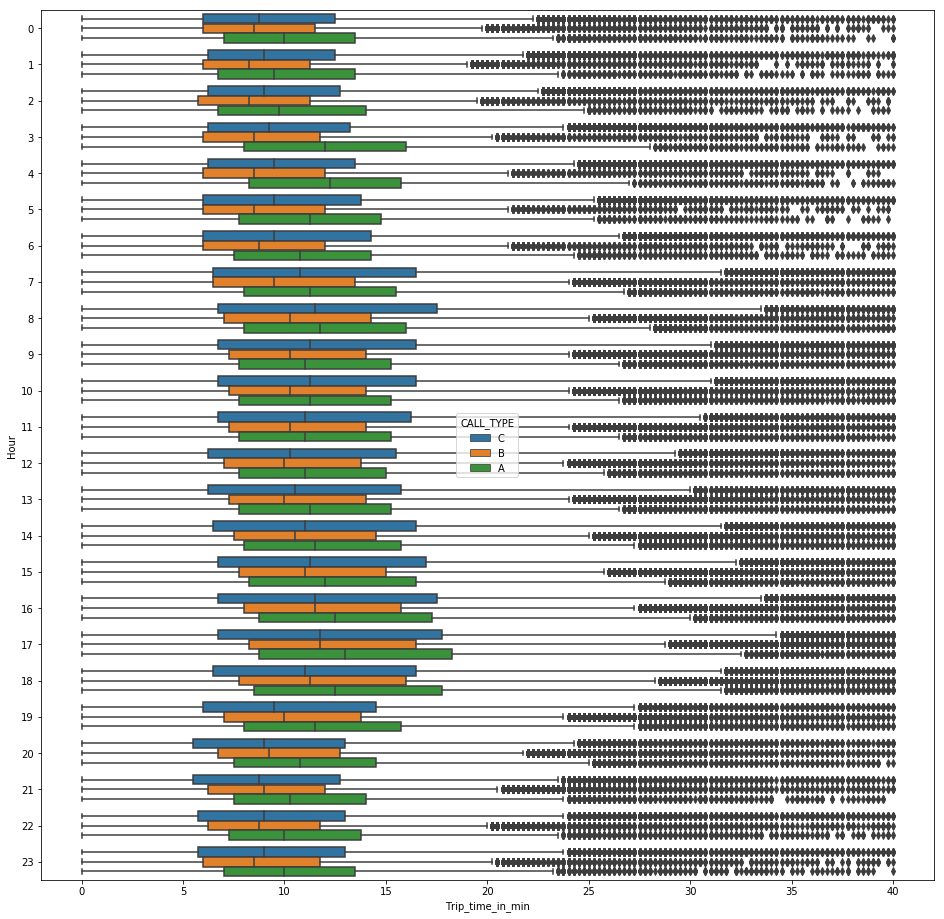

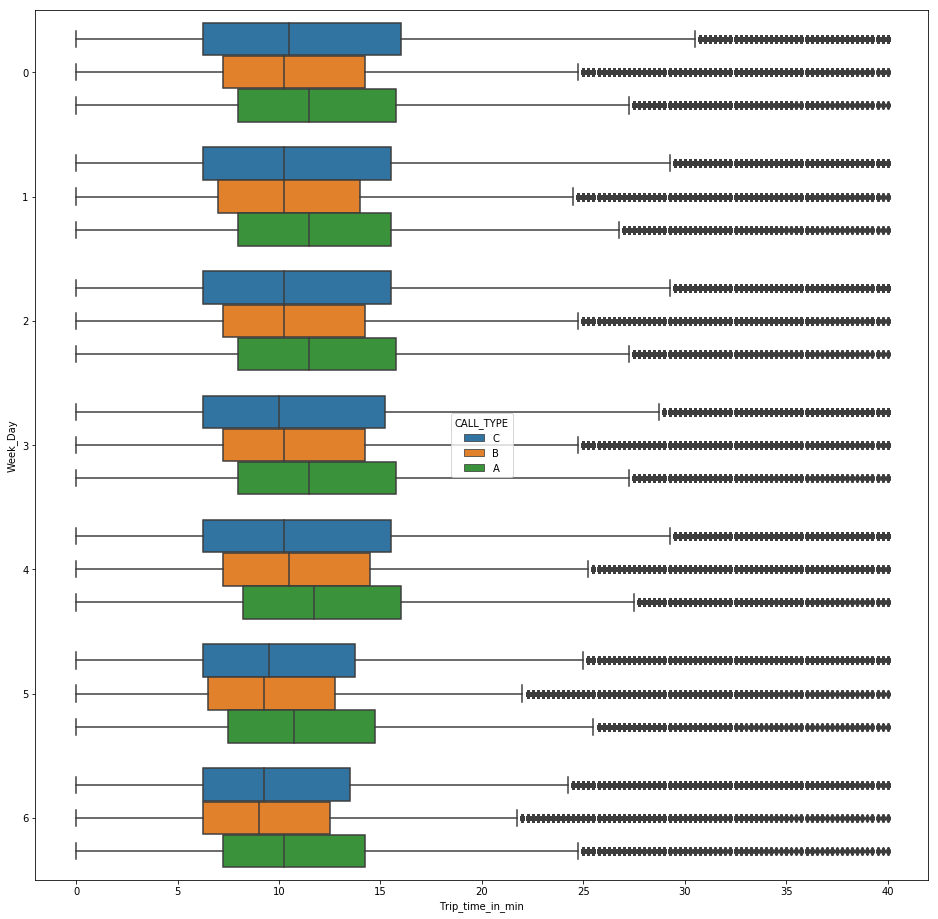

In [25]:

for x in ['Year','Month','Day','Hour','Week_Day']:
    plt.figure(figsize=(16, 16))
    sns.boxplot(y = x, x = 'Trip_time_in_min',data = cab_data_nomiss[cab_data_nomiss['Trip_time_in_min']<=40],orient = "h",hue='CALL_TYPE')
    plt.show()
    